<a href="https://colab.research.google.com/github/EllieZhangy/Loan-Prediction/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

### Yue Zhang

In [ ]:
# Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

# Step 1: Preprocess the data

### 1.1 Read the Data

In [ ]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [ ]:
print('Train columns with null values:\n', df.isnull().sum())

Train columns with null values:
 X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64


## 1.2 Process the Data and Choose the Columns for Modeling

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [ ]:
df1 = df.copy()

### 1.2.1 Format some columns:

- **Replace the % in 'X1' and 'X30' and transform them into float.**

In [ ]:
# X1: Interest Rate on the loan
# X30: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
df1['X1'] = df1['X1'].str.replace('%', '').astype(float) / 100
df1['X30'] = df1['X30'].str.replace('%', '').astype(float) / 100
print(df1['X1'].dtype)
print(df1['X30'].dtype)

float64
float64


- **For 'X4','X5','X6': delete the '$' before the number and change the data type into float.**

In [ ]:
df1['X4'] = df1['X4'].str.replace('$', '').str.replace(',', '').astype(float)
df1['X5'] = df1['X5'].str.replace('$', '').str.replace(',', '').astype(float)
df1['X6'] = df1['X6'].str.replace('$', '').str.replace(',', '').astype(float)
print(df1['X4'].head())
print(df1['X5'].head())
print(df1['X6'].head())

0    25000.0
1     7000.0
2    25000.0
3     1200.0
4    10800.0
Name: X4, dtype: float64
0    25000.0
1     7000.0
2    25000.0
3     1200.0
4    10800.0
Name: X5, dtype: float64
0    19080.0
1      673.0
2    24725.0
3     1200.0
4    10692.0
Name: X6, dtype: float64


<AxesSubplot:>

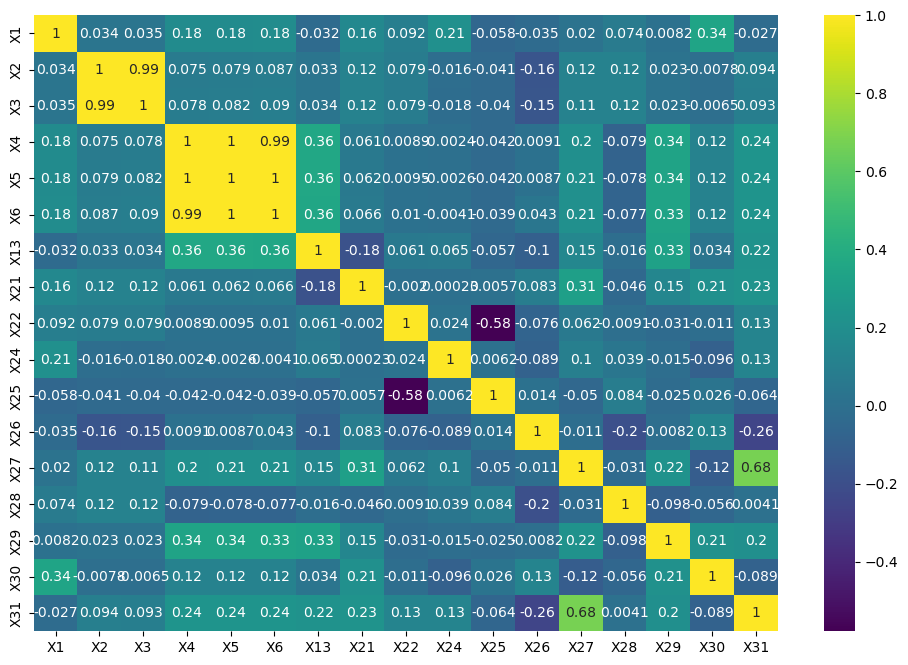

In [ ]:
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='viridis')

### 1.2.2 Select  the Columns for Modeling:

- **As we had observe, some columns will not be helping building the model**, including 'X2'(A unique id for the loan) and 'X3'(A unique id assigned for the borrower),....etc.
- Also, **columns are text which cannot be label encoded as they have arbitrary categorical text and very less unique data for each of their categories**, including 'X10'(Employer or job title (self-filled)), 'X16'(Reason for loan provided by borrower) and 'X18'( Loan title, as provided by borrower),...etc.
- **From heatplot above, we could see that some variables are highly correlated** (for example, 'X4'(Loan amount requested),'X5'(Loan amount funded) and 'X6'(Investor-funded portion of loan), here I only keep 'X4'.
- **Some category varaiables are also highly correlated**, for example, 'X8'(grade) and 'X9'(subgrade)(only keep the feature subgrade), 'X19'(First 3 numbers of zip code) and 'X20'(State of borrower') (only keep the feature state).

**Based on this, I select these features for modeling:**

In [ ]:
cols = ['X1', 'X4','X7','X9','X11','X12','X13','X17','X20','X21','X26','X27','X29','X30','X31','X32']

In [ ]:
data = df1[cols]

In [ ]:
data.head()

,X1,X4,X7,X9,X11,X12,X13,X17,X20,X21,X26,X27,X29,X30,X31,X32
0,0.1189,25000.0,36 months,B4,< 1 year,RENT,85000.0,debt_consolidation,CA,19.48,NaN,10.0,28854.0,0.521,42.0,f
1,0.1071,7000.0,36 months,B5,< 1 year,RENT,65000.0,credit_card,NY,14.29,NaN,7.0,33623.0,0.767,7.0,f
2,0.1699,25000.0,36 months,D3,1 year,RENT,70000.0,debt_consolidation,NY,10.50,NaN,10.0,19878.0,0.663,17.0,f
3,0.1311,1200.0,36 months,C2,10+ years,OWN,54000.0,debt_consolidation,TX,5.47,NaN,5.0,2584.0,0.404,31.0,f
4,0.1357,10800.0,36 months,C3,6 years,RENT,32000.0,debt_consolidation,CT,11.63,NaN,14.0,3511.0,0.256,40.0,f


## 1.3 Deal with the Missing Value

In [ ]:
print('Train columns with null values:\n', data.isnull().sum())

Train columns with null values:
 X1      61010
X4          1
X7          1
X9      61270
X11     17538
X12     61361
X13     61028
X17         1
X20         1
X21         1
X26    348845
X27         1
X29         1
X30       267
X31         1
X32         1
dtype: int64


In [ ]:
# For training dataset, first delete the row where all the value is missing
data[data.isnull().sum(axis=1) > 10].index

Int64Index([364111], dtype='int64')

In [ ]:
data.iloc[364111,:]

X1     0.0769
X4        NaN
X7        NaN
X9        NaN
X11       NaN
X12       NaN
X13       NaN
X17       NaN
X20       NaN
X21       NaN
X26       NaN
X27       NaN
X29       NaN
X30       NaN
X31       NaN
X32       NaN
Name: 364111, dtype: object

In [ ]:
#delete row 364111
df_train = data.drop(364111)

In [ ]:
print('Train columns with null values:\n', df_train.isnull().sum())

Train columns with null values:
 X1      61010
X4          0
X7          0
X9      61269
X11     17537
X12     61360
X13     61027
X17         0
X20         0
X21         0
X26    348844
X27         0
X29         0
X30       266
X31         0
X32         0
dtype: int64


In [ ]:
print('Percent of missing "X1" records is %.2f%%' %((df_train['X1'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X9" records is %.2f%%' %((df_train['X9'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X11" records is %.2f%%' %((df_train['X11'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X12" records is %.2f%%' %((df_train['X12'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X13" records is %.2f%%' %((df_train['X13'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X26" records is %.2f%%' %((df_train['X26'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "X30" records is %.2f%%' %((df_train['X30'].isnull().sum()/data.shape[0])*100))

Percent of missing "X1" records is 15.25%
Percent of missing "X9" records is 15.32%
Percent of missing "X11" records is 4.38%
Percent of missing "X12" records is 15.34%
Percent of missing "X13" records is 15.26%
Percent of missing "X26" records is 87.21%
Percent of missing "X30" records is 0.07%


- **For 'X9'(Loan subgrade): replace the missing values in a categorical column with a new category "Others".**

In [ ]:
df_train['X9'].value_counts()

B3    24009
B4    22611
B2    19853
C1    19285
C2    19182
B5    18301
C3    18244
C4    17225
B1    16894
C5    16135
A5    15485
D1    13840
A4    13837
D2    12479
D3    10818
D4    10131
A3     9031
D5     8353
A2     7678
A1     7676
E1     6408
E2     6181
E3     4978
E4     4291
E5     3660
F1     2878
F2     2202
F3     2022
F4     1537
F5     1145
G1      790
G2      598
G3      428
G4      300
G5      245
Name: X9, dtype: int64

In [ ]:
df_train['X9'].fillna("Others", inplace=True)

- **For 'X11': it indicates the number of working years so if missing, one should assume that the borrower never worked and the number of working years should be a minimum:**

In [ ]:
df_train['X11'].value_counts()

10+ years    128060
2 years       35427
3 years       31428
< 1 year      30607
5 years       27277
1 year        25321
4 years       24035
6 years       23062
7 years       22837
8 years       19139
9 years       15269
Name: X11, dtype: int64

In [ ]:
df_train["X11"].fillna('< 1 year', inplace=True)

- **For 'X13' (Annual income of borrower): From the plot below, we could find out that its distribution is uneven, there are some very large values, so I will impute with median value:**

<AxesSubplot:xlabel='X13', ylabel='Density'>

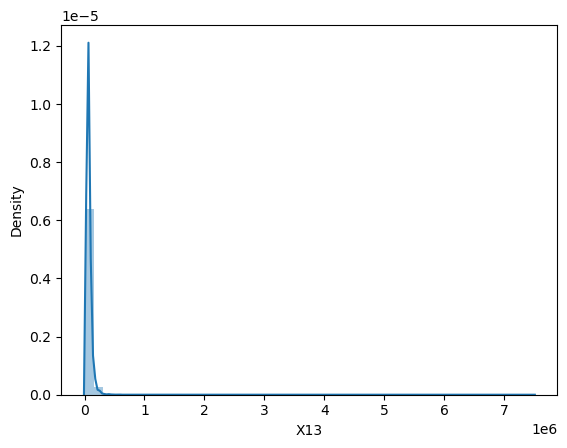

In [ ]:
sns.distplot(df_train[df_train['X13'].notnull()]['X13'])

In [ ]:
# mean 
print('The mean of "Annual income of borrower" is %.2f' %(df_train["X13"].mean(skipna=True)))
# median
print('The median of "Annual income of borrower" is %.2f' %(df_train["X13"].median(skipna=True)))

The mean of "Annual income of borrower" is 73160.15
The median of "Annual income of borrower" is 63000.00


In [ ]:
df_train["X13"].fillna(df_train["X13"].median(skipna=True), inplace=True)

- **For 'X26', 87.21% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model:**

In [ ]:
df_train.drop('X26', axis=1, inplace=True)

- **For 'X30': There are only 0.07% missing values, so we can just impute the revolving line utilization rate with the most people had:**

In [ ]:
df_train['X30'].value_counts()

0.0000    2021
0.5300     729
0.5700     725
0.5800     722
0.6100     710
          ... 
0.0083       1
0.4736       1
0.2465       1
0.1061       1
1.1080       1
Name: X30, Length: 1231, dtype: int64

In [ ]:
print('The most common boarding port of embarkation is %s.' %df_train['X30'].value_counts().idxmax())

The most common boarding port of embarkation is 0.0.


In [ ]:
df_train["X30"].fillna(df_train['X30'].value_counts().idxmax(), inplace=True)

- **For the rest: 'X1'(Interest Rate on the loan) and 'X12' (Home ownership status: RENT, OWN, MORTGAGE, OTHER):delete the rows with missing values.**  
This is because: 'X1' is the target; 'X12' is categorical variable but already contains a category of 'others'.

In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287030 entries, 0 to 399998
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      287030 non-null  float64
 1   X4      287030 non-null  float64
 2   X7      287030 non-null  object 
 3   X9      287030 non-null  object 
 4   X11     287030 non-null  object 
 5   X12     287030 non-null  object 
 6   X13     287030 non-null  float64
 7   X17     287030 non-null  object 
 8   X20     287030 non-null  object 
 9   X21     287030 non-null  float64
 10  X27     287030 non-null  float64
 11  X29     287030 non-null  float64
 12  X30     287030 non-null  float64
 13  X31     287030 non-null  float64
 14  X32     287030 non-null  object 
dtypes: float64(8), object(7)
memory usage: 35.0+ MB


In [ ]:
selected_col = df_train.columns.tolist()
print("Selected Columns:\n", selected_col)

Selected Columns:
 ['X1', 'X4', 'X7', 'X9', 'X11', 'X12', 'X13', 'X17', 'X20', 'X21', 'X27', 'X29', 'X30', 'X31', 'X32']


## 1.4 Perform EDA

**Heatmap of numerical vairables:**

<AxesSubplot:>

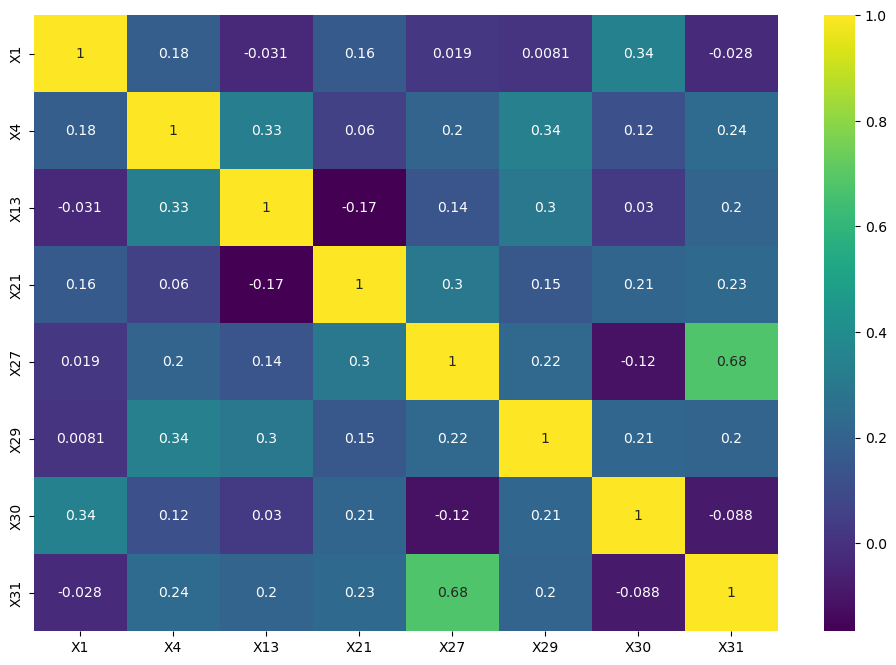

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')

**The distribution of Target:**

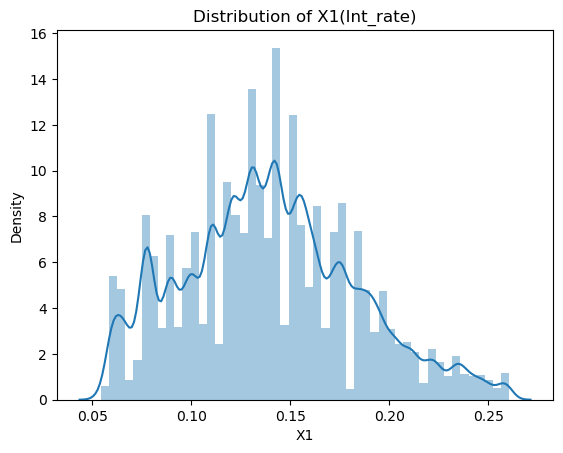

In [ ]:
ax = sns.distplot(df_train['X1'])
ax.set_title('Distribution of X1(Int_rate)')

plt.show()

**For numerical features:**

Text(0.5, 1.0, 'Distribution of X31(total_acc)')

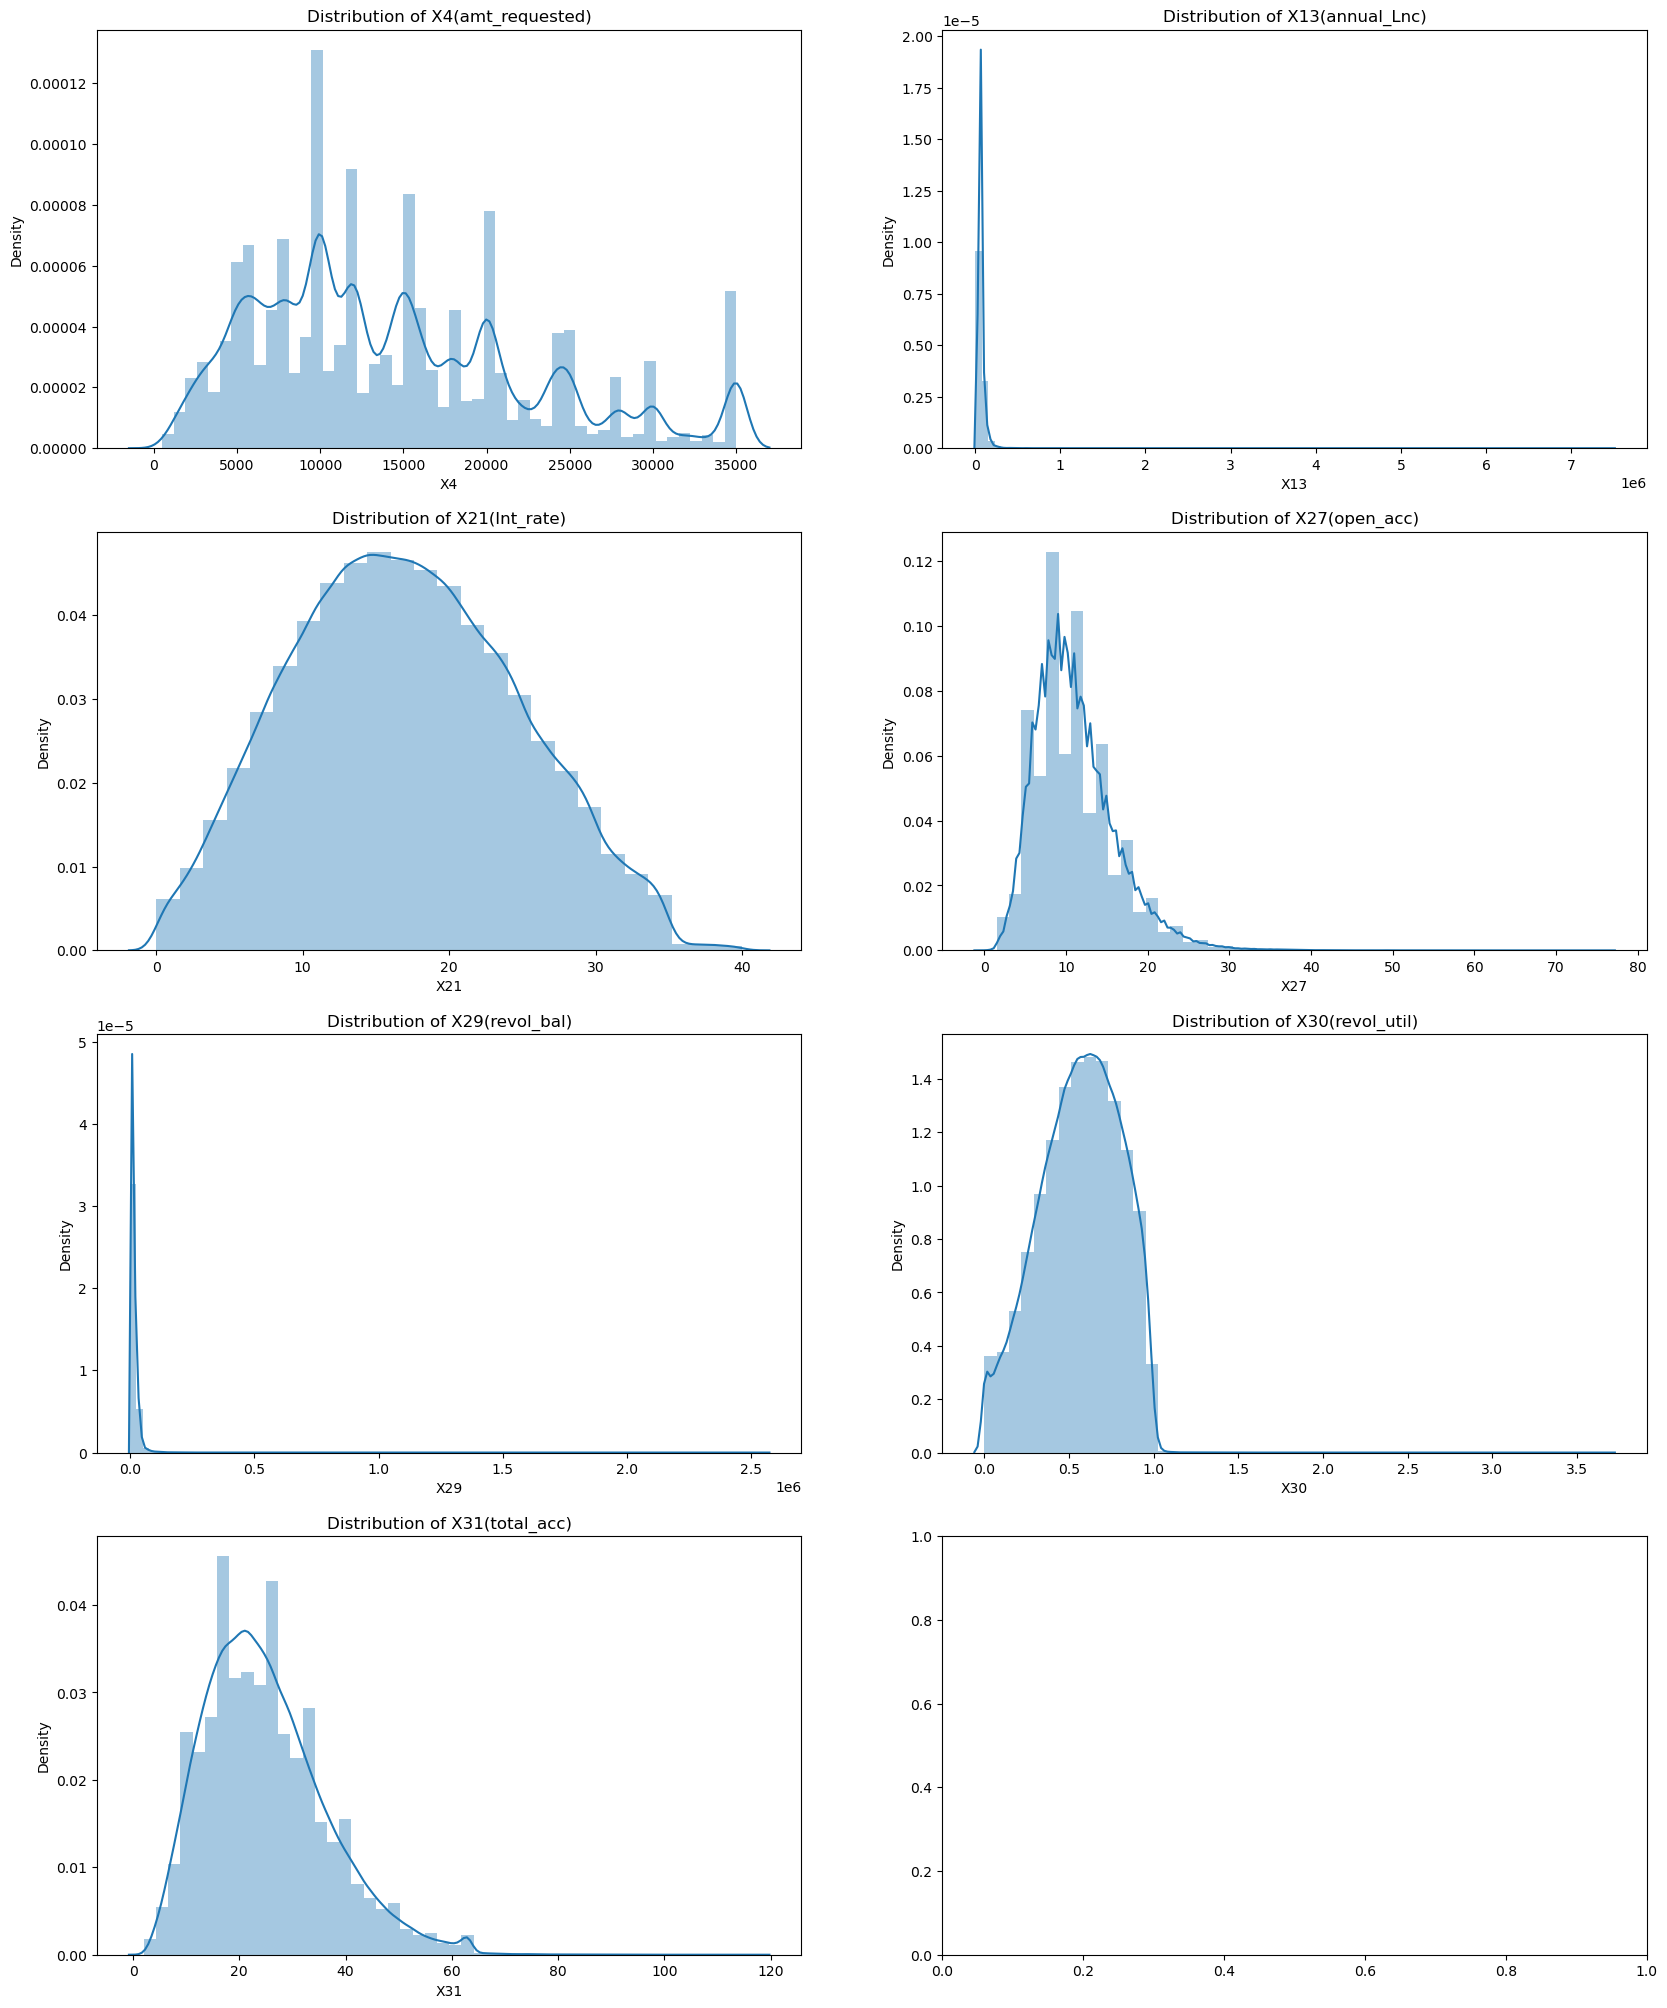

In [ ]:
fig, qaxis = plt.subplots(4,2, figsize=(20,25))

sns.distplot(df_train['X4'],ax = qaxis[0,0])
qaxis[0,0].set_title('Distribution of X4(amt_requested)')

sns.distplot(df_train['X13'],ax = qaxis[0,1], bins=100)
qaxis[0,1].set_title('Distribution of X13(annual_Lnc)')

sns.distplot(df_train['X21'],ax = qaxis[1,0],bins=25)
qaxis[1,0].set_title('Distribution of X21(Int_rate)')

sns.distplot(df_train['X27'],ax = qaxis[1,1])
qaxis[1,1].set_title('Distribution of X27(open_acc)')

sns.distplot(df_train['X29'],ax = qaxis[2,0],bins=100)
qaxis[2,0].set_title('Distribution of X29(revol_bal)')

sns.distplot(df_train['X30'],ax = qaxis[2,1])
qaxis[2,1].set_title('Distribution of X30(revol_util)')

sns.distplot(df_train['X31'],ax = qaxis[3,0])
qaxis[3,0].set_title('Distribution of X31(total_acc)')


**For categorical features:**

In [ ]:
df_train.select_dtypes('object').head()

,X7,X9,X11,X12,X17,X20,X32
0,36 months,B4,< 1 year,RENT,debt_consolidation,CA,f
1,36 months,B5,< 1 year,RENT,credit_card,NY,f
2,36 months,D3,1 year,RENT,debt_consolidation,NY,f
3,36 months,C2,10+ years,OWN,debt_consolidation,TX,f
4,36 months,C3,6 years,RENT,debt_consolidation,CT,f


- For 'X7'(Number of payments (36 or 60):

In [ ]:
df_train['X7'].value_counts()

 36 months    209963
 60 months     77067
Name: X7, dtype: int64

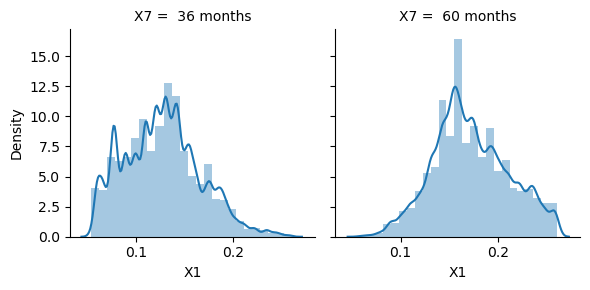

In [ ]:
g = sns.FacetGrid(df_train, col = "X7")
g.map(sns.distplot, "X1", bins = 25)
plt.show()

- For 'X9'(Loan subgrade):

In [ ]:
df_train['X9'].value_counts()

Others    44035
B3        17204
B4        16213
B2        14278
C1        13817
C2        13800
B5        13123
C3        13065
C4        12438
B1        12110
C5        11591
A5        11116
A4        10004
D1         9960
D2         8860
D3         7704
D4         7199
A3         6507
D5         6020
A2         5501
A1         5480
E1         4562
E2         4452
E3         3565
E4         3080
E5         2554
F1         2102
F2         1601
F3         1414
F4         1117
F5          850
G1          563
G2          432
G3          323
G4          210
G5          180
Name: X9, dtype: int64

- For 'X11'(Number of years employed (0 to 10; 10 = 10 or more))

In [ ]:
df_train['X11'].value_counts()

10+ years    91682
< 1 year     34550
2 years      25544
3 years      22566
5 years      19515
1 year       18184
4 years      17197
6 years      16680
7 years      16436
8 years      13741
9 years      10935
Name: X11, dtype: int64

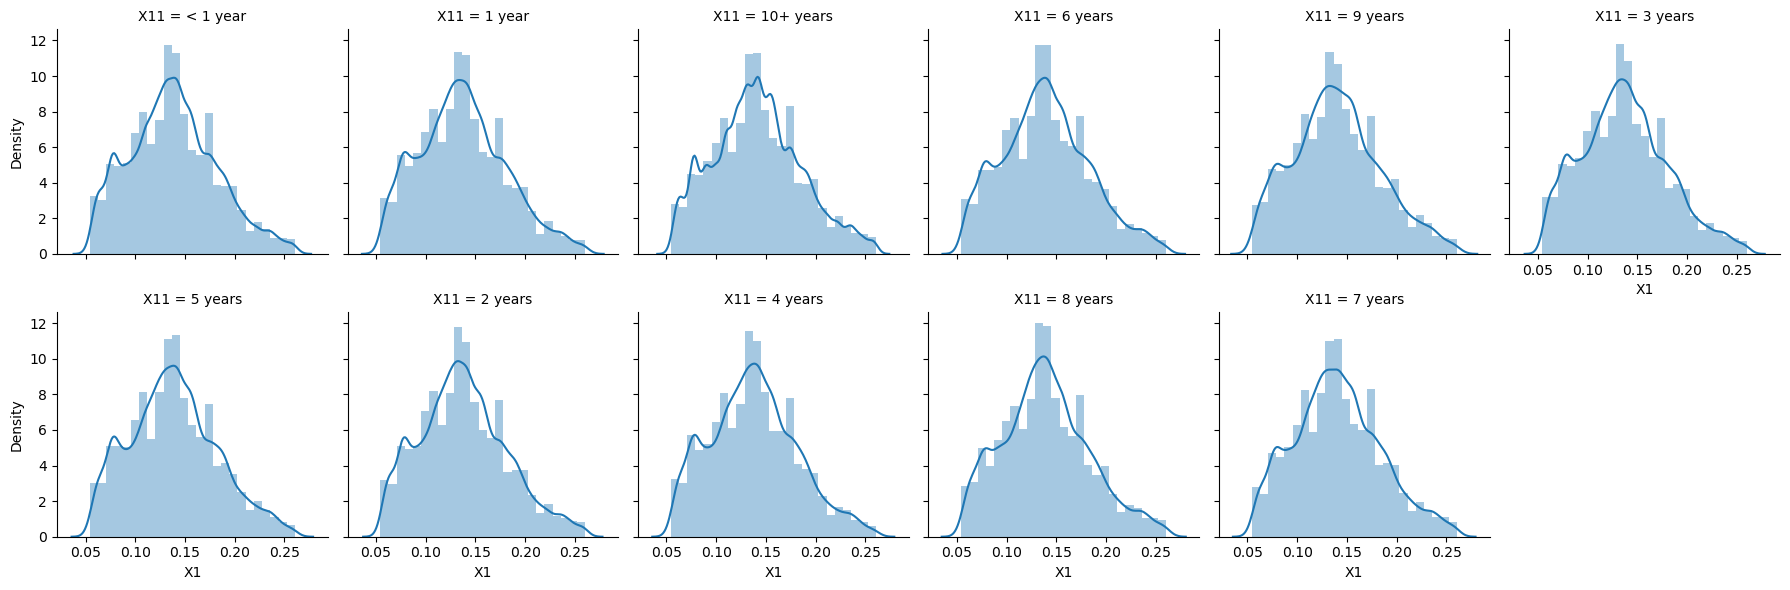

In [ ]:
g = sns.FacetGrid(df_train, col = "X11", col_wrap=6)
g.map(sns.distplot, "X1", bins = 25)
plt.show()

- For 'X12'(Home ownership status: RENT, OWN, MORTGAGE, OTHER):

In [ ]:
df_train['X12'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

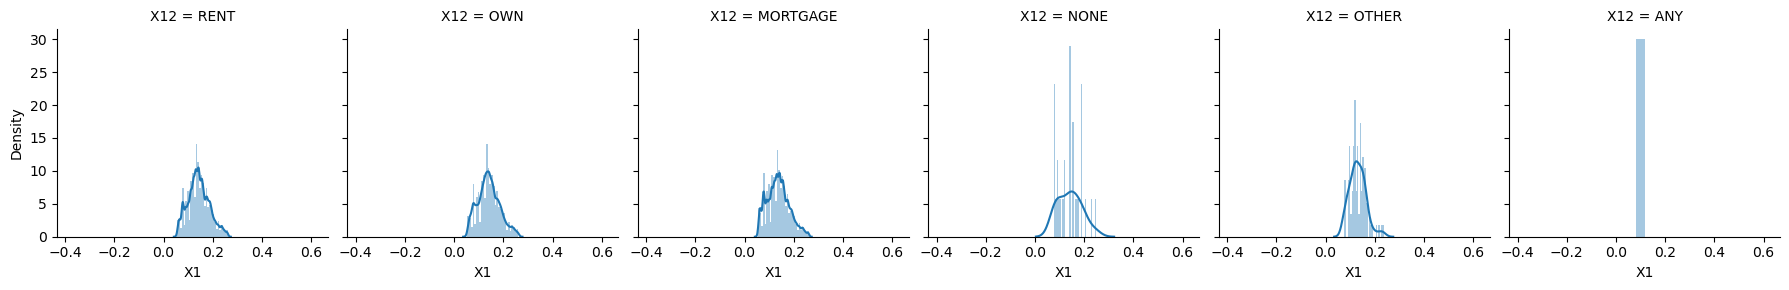

In [ ]:
g = sns.FacetGrid(df_train, col = "X12", col_wrap=6, height = 3)
g.map(sns.distplot, "X1", bins = 30)
plt.show()

- For 'X17'(Loan category, as provided by borrower):

In [ ]:
df_train['X17'].value_counts()

debt_consolidation    167798
credit_card            63989
home_improvement       16619
other                  14565
major_purchase          6195
small_business          4554
car                     3515
medical                 2852
moving                  1817
wedding                 1636
vacation                1572
house                   1444
educational              241
renewable_energy         233
Name: X17, dtype: int64

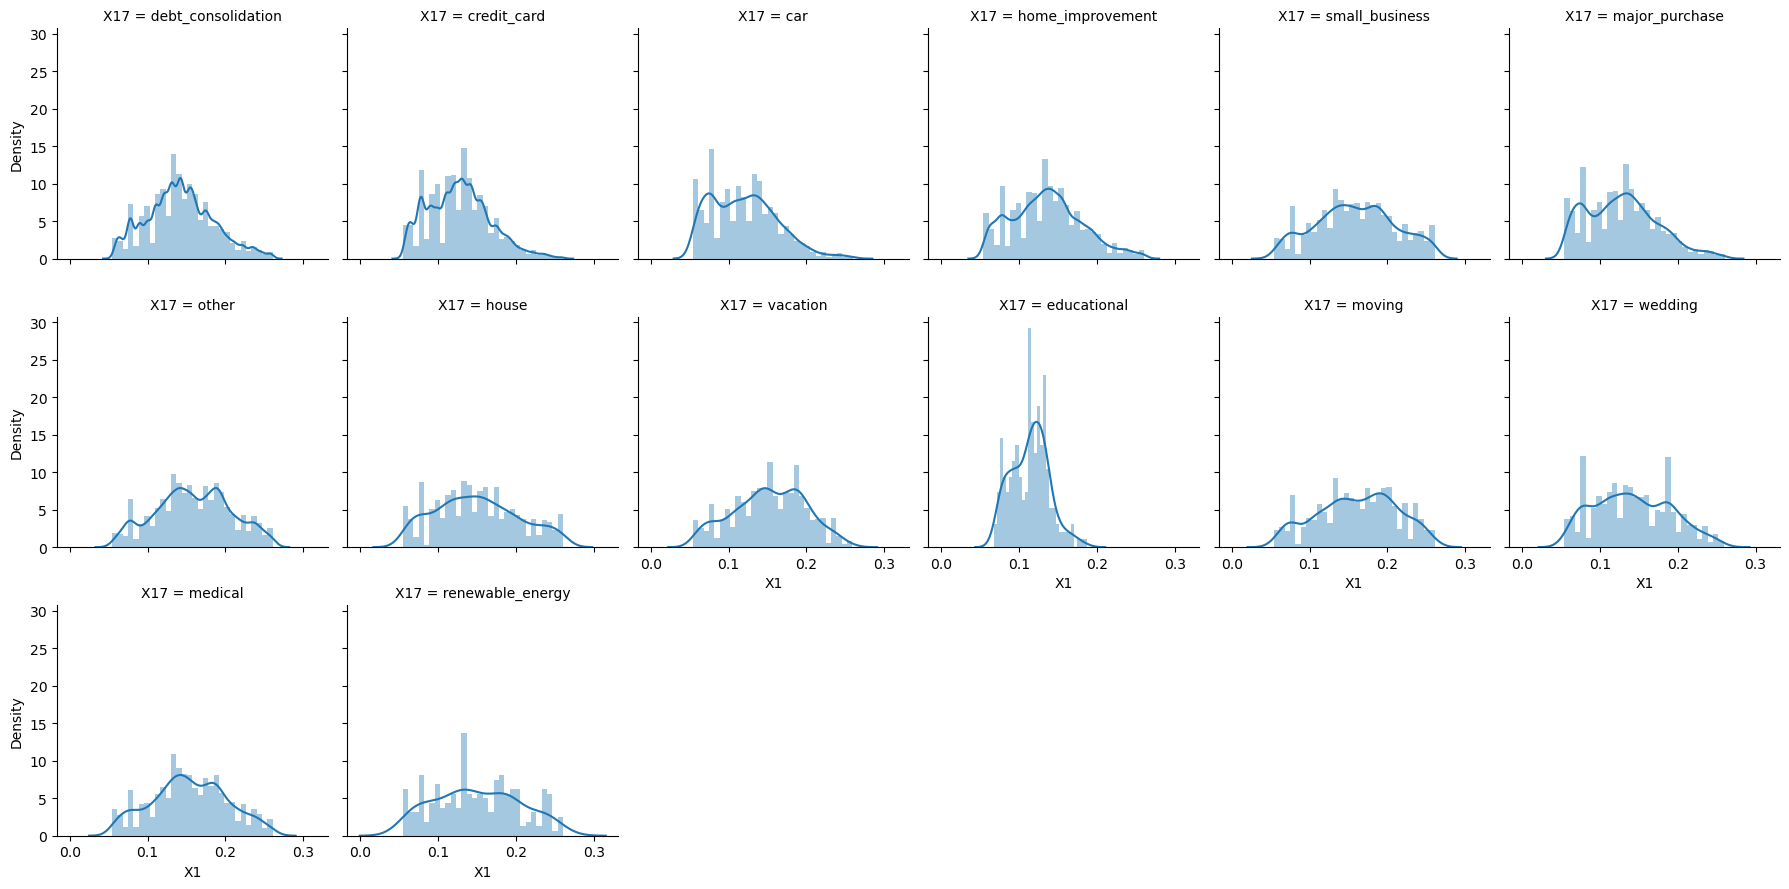

In [ ]:
g = sns.FacetGrid(df_train, col = "X17", col_wrap=6)
g.map(sns.distplot, "X1", bins = 30)
plt.show()

- For 'X20'(State of borrower):

In [ ]:
df_train['X20'].value_counts()

CA    44834
NY    24701
TX    22384
FL    19260
IL    11409
NJ    11186
PA    10031
OH     9329
GA     9177
VA     8739
NC     7896
MI     7092
MD     6825
MA     6733
AZ     6496
WA     6494
CO     6038
MN     4986
MO     4633
CT     4471
NV     3994
IN     3936
OR     3735
WI     3618
AL     3598
TN     3524
LA     3415
SC     3356
KY     2687
KS     2605
OK     2572
UT     2182
AR     2165
NM     1555
HI     1508
WV     1461
NH     1393
RI     1250
DC      926
MT      828
AK      789
DE      767
WY      716
SD      624
MS      587
VT      502
IA        7
ID        7
NE        5
ME        4
Name: X20, dtype: int64

- For 'X32'(The initial listing status of the loan. Possible values are W, F):

In [ ]:
df_train['X32'].value_counts()

f    196988
w     90042
Name: X32, dtype: int64

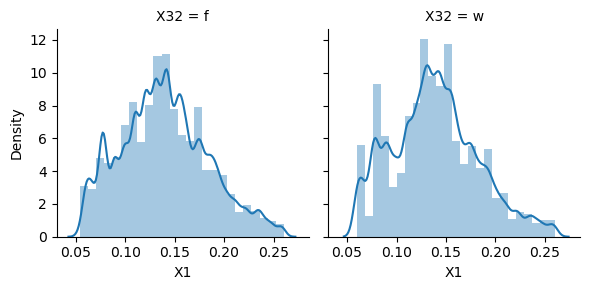

In [ ]:
g = sns.FacetGrid(df_train, col = "X32")
g.map(sns.distplot, "X1", bins = 25)
plt.show()

**Boxplot of X1 for each categorical variables:**

Text(0.5, 1.0, 'Distribution of X1 for different groups of X32(Initial status of the loan)')

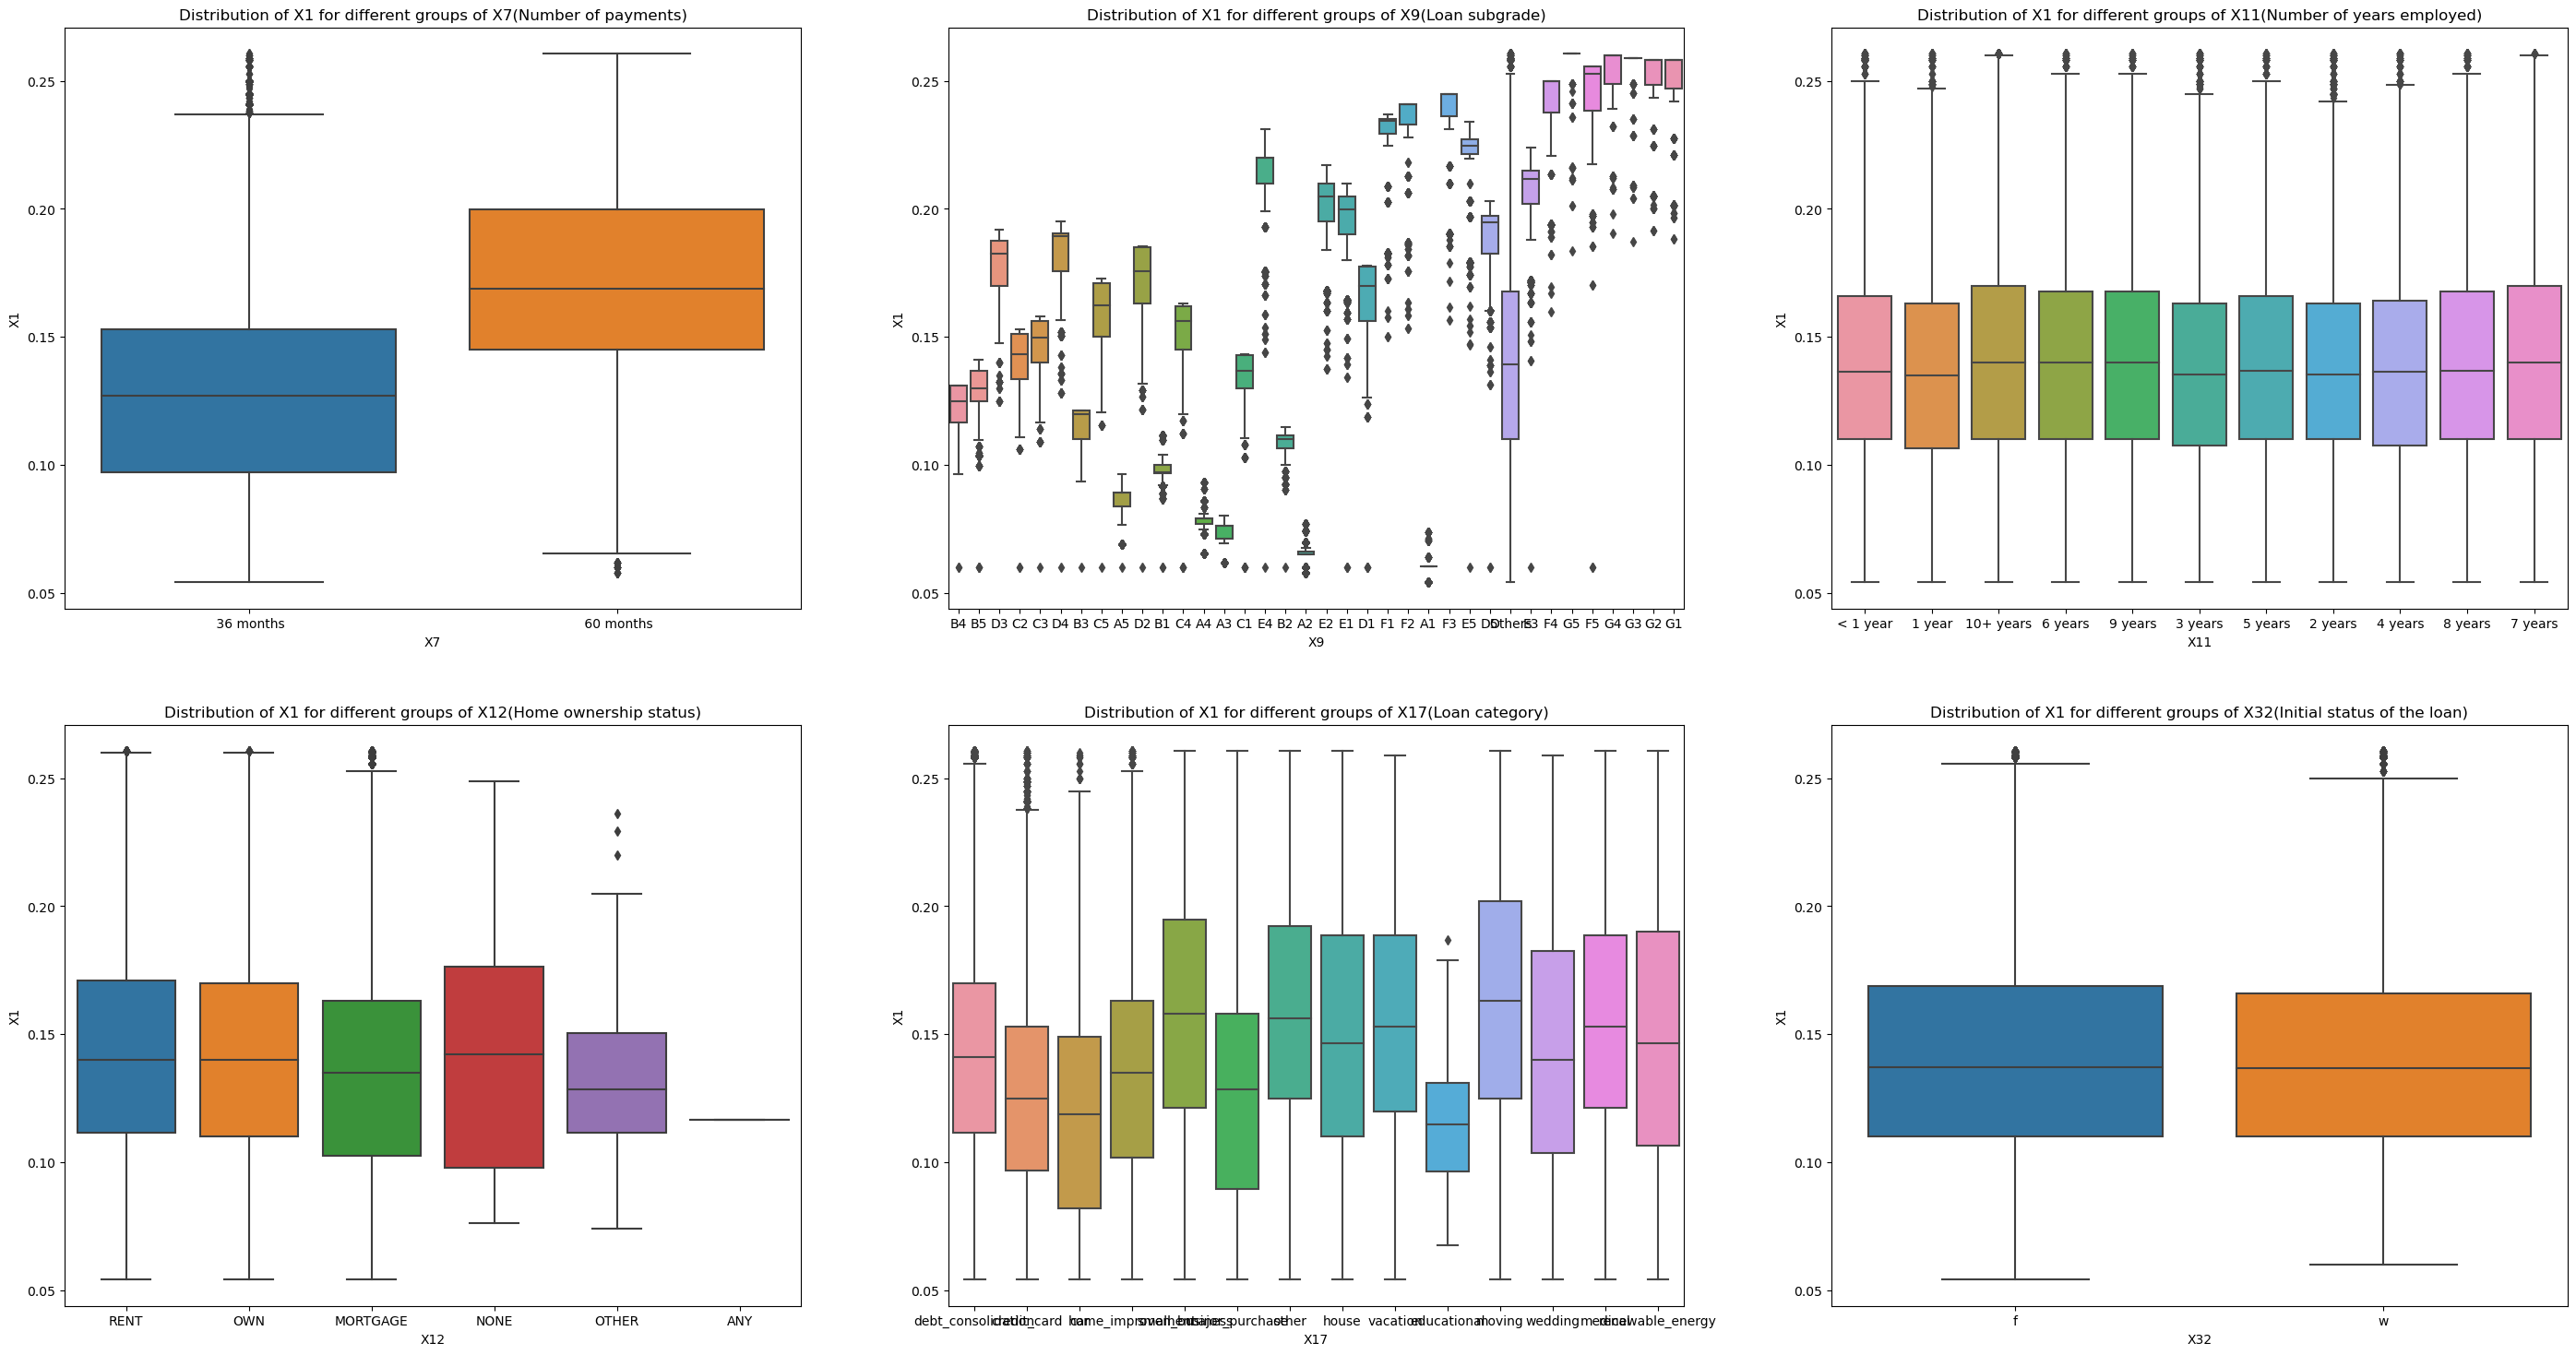

In [ ]:
fig, saxis = plt.subplots(2, 3,figsize=(35,18))

sns.boxplot(x = 'X7', y = 'X1', data=df_train, ax = saxis[0,0])
saxis[0,0].set_title('Distribution of X1 for different groups of X7(Number of payments)')
sns.boxplot(x = 'X9', y = 'X1', data=df_train, ax = saxis[0,1])
saxis[0,1].set_title('Distribution of X1 for different groups of X9(Loan subgrade)')
sns.boxplot(x = 'X11', y = 'X1', data=df_train, ax = saxis[0,2])
saxis[0,2].set_title('Distribution of X1 for different groups of X11(Number of years employed)')
sns.boxplot(x = 'X12', y = 'X1', data=df_train, ax = saxis[1,0])
saxis[1,0].set_title('Distribution of X1 for different groups of X12(Home ownership status)')
sns.boxplot(x = 'X17', y = 'X1', data=df_train, ax = saxis[1,1])
saxis[1,1].set_title('Distribution of X1 for different groups of X17(Loan category)')
sns.boxplot(x = 'X32', y = 'X1', data=df_train, ax = saxis[1,2])
saxis[1,2].set_title('Distribution of X1 for different groups of X32(Initial status of the loan)')

Text(0.5, 1.0, 'Distribution of X1 for different groups of X20(Status)')

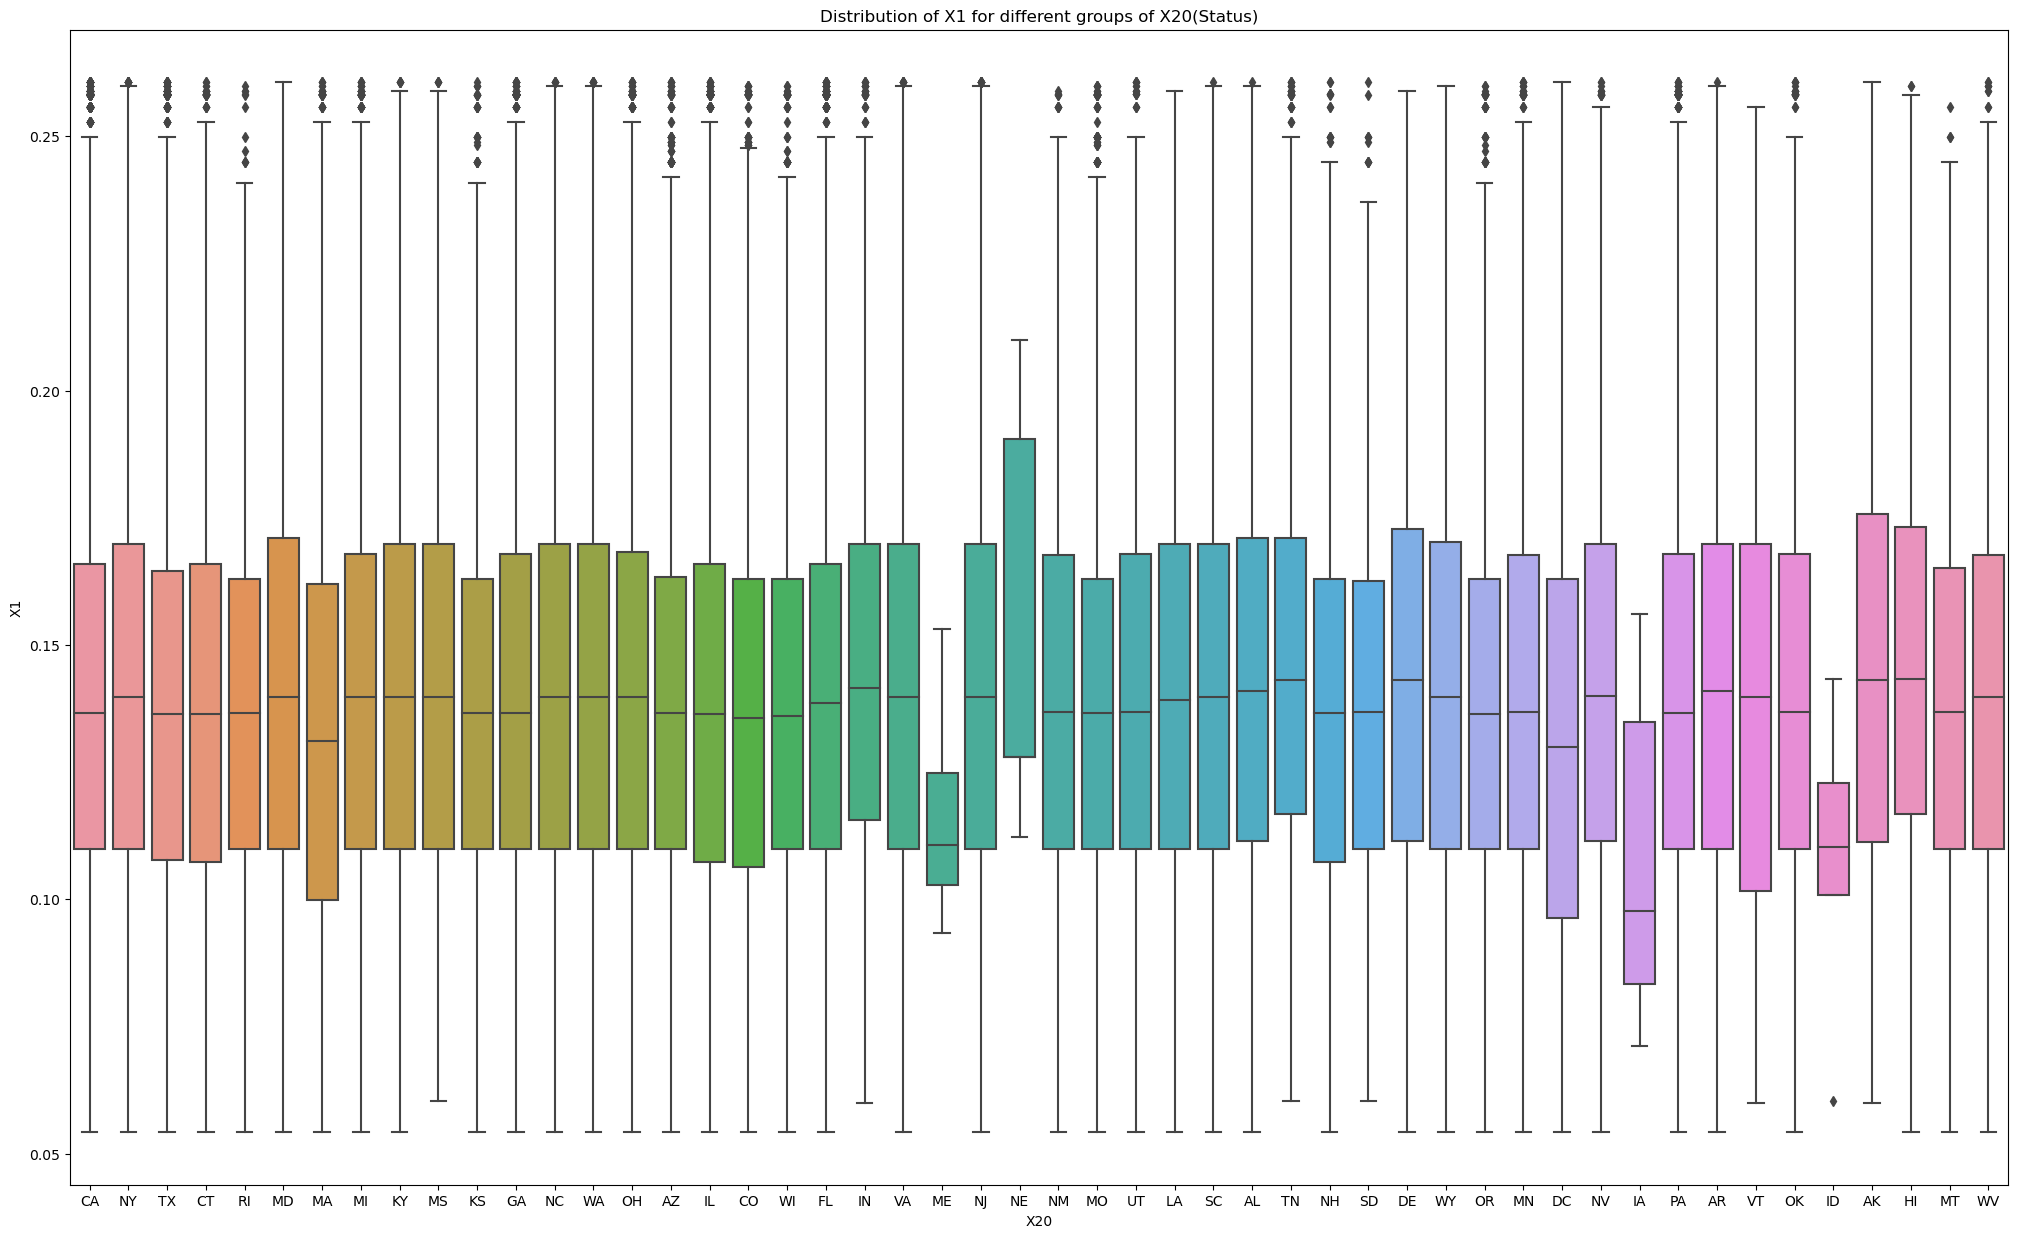

In [ ]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(x = 'X20', y = 'X1', data=df_train)
plt.title('Distribution of X1 for different groups of X20(Status)')

## 1.5 Transform the Data

In [ ]:
data1 = df_train.copy()

#### Deal with Categorical Value:

In [ ]:
data1.select_dtypes('object').head()

,X7,X9,X11,X12,X17,X20,X32
0,36 months,B4,< 1 year,RENT,debt_consolidation,CA,f
1,36 months,B5,< 1 year,RENT,credit_card,NY,f
2,36 months,D3,1 year,RENT,debt_consolidation,NY,f
3,36 months,C2,10+ years,OWN,debt_consolidation,TX,f
4,36 months,C3,6 years,RENT,debt_consolidation,CT,f


- **For 'X7': replace({' 36 months': -1, ' 60 months': 1}**
- **For 'X32', replace({'f': -1, 'w': 1}**

In [ ]:
data1['X7'] = data1['X7'].replace({' 36 months': -1, ' 60 months': 1})
data1['X32'] = data1['X32'].replace({'f': -1, 'w': 1})

- **For 'X9','X12','X17','X20', use label encoding:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder object
le = LabelEncoder()
# Fit the LabelEncoder on the column you want to encode
le.fit(data1["X9"])
# Transform the column using the `transform` method
data1["X9"] = le.transform(data1["X9"])

In [ ]:
# For 'X12', first change 'None' and 'Any' into type 'Others':
data1['X12'] = data1['X12'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})
# Then do the encoding:
le.fit(data1["X12"])
data1["X12"] = le.transform(data1["X12"])

In [ ]:
le.fit(data1["X17"])
data1["X17"] = le.transform(data1["X17"])

In [ ]:
le.fit(data1["X20"])
data1["X20"] = le.transform(data1["X20"])

- **For 'X11': The feature should be changed to float. I replace the extreme cases of "< 1 year" and "10+ years" with "0 years" and "11 years" respectively to separate these groups from the rest.**


In [ ]:
data1['X11'] = data1['X11'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
data1['X11'] = data1['X11'].str.extract('(\d+)').astype('float')
data1['X11'].head()

0     0.0
1     0.0
2     1.0
3    11.0
4     6.0
Name: X11, dtype: float64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287030 entries, 0 to 399998
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      287030 non-null  float64
 1   X4      287030 non-null  float64
 2   X7      287030 non-null  int64  
 3   X9      287030 non-null  int64  
 4   X11     287030 non-null  float64
 5   X12     287030 non-null  int64  
 6   X13     287030 non-null  float64
 7   X17     287030 non-null  int64  
 8   X20     287030 non-null  int64  
 9   X21     287030 non-null  float64
 10  X27     287030 non-null  float64
 11  X29     287030 non-null  float64
 12  X30     287030 non-null  float64
 13  X31     287030 non-null  float64
 14  X32     287030 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 35.0 MB


In [ ]:
data1.head()

,X1,X4,X7,X9,X11,X12,X13,X17,X20,X21,X27,X29,X30,X31,X32
0,0.1189,25000.0,-1,8,0.0,3,85000.0,2,4,19.48,10.0,28854.0,0.521,42.0,-1
1,0.1071,7000.0,-1,9,0.0,3,65000.0,1,33,14.29,7.0,33623.0,0.767,7.0,-1
2,0.1699,25000.0,-1,17,1.0,3,70000.0,2,33,10.50,10.0,19878.0,0.663,17.0,-1
3,0.1311,1200.0,-1,11,11.0,2,54000.0,2,42,5.47,5.0,2584.0,0.404,31.0,-1
4,0.1357,10800.0,-1,12,6.0,3,32000.0,2,6,11.63,14.0,3511.0,0.256,40.0,-1


# Step 2: Build Models

### 2.1 Produce and Save the Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Models Selection and Initialization
Models = [
    #Ensemble Methods
    LinearRegression(),
    Ridge(),
    Lasso(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
    ]


### 2.2 Loads and Applies the Models

In [ ]:
# Split the data
import sklearn.model_selection as cv
X = data1.drop('X1', axis=1)
y = data1['X1'].values
y = y.ravel()
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.30)

In [ ]:
# Create table to compare classifier metrics
Models_columns = ['Name','Parameters','Time','Test_MSE','Train_MSE','Test_MAE','Train_MAE',
                'Test_Explained_variance', 'Train_Explained_variance']
Models_compare = pd.DataFrame(columns = Models_columns)

In [ ]:
# Choose scoring metrics:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'explained_variance']


# index through classifier and save performance to table
row_index = 0
for alg in Models:

    # Set name and parameters
    Models_name = alg.__class__.__name__
    Models_compare.loc[row_index, 'Name'] = Models_name
    Models_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    # model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, x_train, y_train, cv  = 3 , 
                                                return_train_score=True, scoring=scoring, n_jobs=-1)
    
    Models_compare.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    Models_compare.loc[row_index, 'Test_MSE'] = -cv_results['test_neg_mean_squared_error'].mean()
    Models_compare.loc[row_index, 'Train_MSE'] = -cv_results['train_neg_mean_squared_error'].mean()
    Models_compare.loc[row_index, 'Test_RMSE'] = np.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
    Models_compare.loc[row_index, 'Train_RMSE'] = np.sqrt(-cv_results['train_neg_mean_squared_error'].mean())
    Models_compare.loc[row_index, 'Test_MAE'] = -cv_results['test_neg_mean_absolute_error'].mean()
    Models_compare.loc[row_index, 'Train_MAE'] = -cv_results['train_neg_mean_absolute_error'].mean()
    Models_compare.loc[row_index, 'Test_Explained_variance'] = cv_results['test_explained_variance'].mean()
    Models_compare.loc[row_index, 'Train_Explained_variance'] = cv_results['train_explained_variance'].mean()

    row_index+=1

### 2.3 Compare Different Models

In [ ]:
Models_compare.sort_values(by = ['Test_RMSE'], ascending = True, inplace = True)
Models_compare

,Name,Parameters,Time,Test_MSE,Train_MSE,Test_MAE,Train_MAE,Test_Explained_variance,Train_Explained_variance,Test_RMSE,Train_RMSE
7,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",11.905007,0.000217,0.000171,0.008797,0.008067,0.886752,0.910636,0.014718,1.307433e-02
5,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",80.372763,0.000226,0.000032,0.009,0.003328,0.881765,0.983532,0.015039,5.612661e-03
6,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",17.845078,0.000233,0.00023,0.009208,0.009172,0.878262,0.8796,0.015260,1.517565e-02
4,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",1.3187,0.000456,0.0,0.011919,0.0,0.76152,1.0,0.021358,2.724999e-17
1,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.614476,0.000992,0.000992,0.024695,0.024692,0.481255,0.481471,0.031500,3.149355e-02
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.944753,0.000992,0.000992,0.024695,0.024692,0.481255,0.481471,0.031500,3.149355e-02
2,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.621014,0.001834,0.001832,0.034198,0.034195,0.04138,0.042068,0.042821,4.280575e-02
3,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",6.018994,0.002228,0.002228,0.038626,0.038625,0.012724,0.012791,0.047199,4.719746e-02


Text(0, 0.5, 'Algorithm')

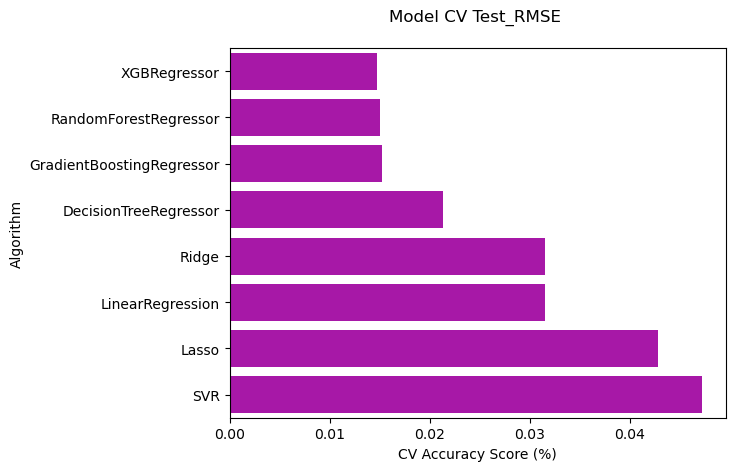

In [ ]:
# plot the models CV accuracy sore in a aescending order by test RMSE
sns.barplot(x='Test_RMSE', y = 'Name', data = Models_compare, color = 'm')

plt.title('Model CV Test_RMSE \n')
plt.xlabel('CV Accuracy Score (%)')
plt.ylabel('Algorithm')

### 2.4 Choose the Final Model for Testing

By comparing different models, we could find that **XGBRegressor, RandomForestRegressor, and HradientBoostingRegressor** are the top best models.    
Here I Choose the **XGBRegressor** as the final model because its test RMSE and train RMSE are very close, which means it performs well on both traning and testing dataset and may not have the overfitting problem.   
Based on this, I tune the model with hyper-parameters, then run the model on the testing dataset in the next part.

Look at the **XGBRegressor** more closely:

In [ ]:
Models_compare[Models_compare['Name'] == 'XGBRegressor']

,Name,Parameters,Time,Test_MSE,Train_MSE,Test_MAE,Train_MAE,Test_Explained_variance,Train_Explained_variance,Test_RMSE,Train_RMSE
7,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",11.905007,0.000217,0.000171,0.008797,0.008067,0.886752,0.910636,0.014718,0.013074


### 2.5 Overfit-Underfit Diagnosis

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:{:.5f}".format(rmse))

mse_CV = -cross_val_score(xgb, x_train, y_train, cv=6, scoring="neg_mean_squared_error", n_jobs=-1) 
rmse_CV = np.sqrt((mse_CV.mean()))
print('CV RMSE: {:.5f}'.format(rmse_CV))

y_pred_train = xgb.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('Train RMSE: {:.5f}'.format(rmse_train))

Test RMSE:0.01469
CV RMSE: 0.01466
Train RMSE: 0.01336


Here I use RMSE to do the diagnosis. The result shows that **train RMSE, CV RMSE, test RMSE are very similar**, so we could consider that the final model we choose (XGBoostRegressor) **pass the Overfit-Underfit diagnosis.**

### 2.6 Tune the Final Model with Hyper-Parameters:

In [ ]:
xgb_base = Models_compare[Models_compare['Name'] == 'XGBRegressor']
# Basic model:
print('BEFORE: Parameters: ', xgb_base['Parameters'])
print("BEFORE: Training w/bin cv score mean: {:.5f}". format(xgb_base['Train_RMSE'].values[0]))
print("BEFORE: Test w/bin cv score mean: {:.5f}". format(xgb_base['Test_RMSE'].values[0]))
print('-'*10)

# Choose best model with grid_search:
param_grid = {'eta' :[0.01, 0.1, 0.3], # default:0.3
              'max_depth': [4, 6, 8], # default:6
              'random_state': [0] 
             }

tune_model = model_selection.GridSearchCV(XGBRegressor(), param_grid=param_grid, cv = 4,
                                          return_train_score=True, scoring='neg_mean_squared_error', n_jobs = -1)
tune_model.fit(x_train, y_train)

print('AFTER: Parameters: ', tune_model.best_params_)
train_rmse = tune_model.cv_results_['mean_train_score'][tune_model.best_index_]
print("AFTER: Training w/bin cv score mean: {:.5f}". format(np.sqrt((-train_rmse).mean())))
test_rmse = tune_model.cv_results_['mean_test_score'][tune_model.best_index_]
print("AFTER: Test w/bin cv score mean: {:.5f}". format(np.sqrt((-test_rmse).mean())))
print('-'*10)

BEFORE: Parameters:  7    {'objective': 'reg:squarederror', 'base_score'...
Name: Parameters, dtype: object
BEFORE: Training w/bin cv score mean: 0.01307
BEFORE: Test w/bin cv score mean: 0.01472
----------
AFTER: Parameters:  {'eta': 0.1, 'max_depth': 8, 'random_state': 0}
AFTER: Training w/bin cv score mean: 0.01309
AFTER: Test w/bin cv score mean: 0.01462
----------


From above we could find that tuning the hyper-parameters cannot significantly improve the model's performance. And to avoid overfitting, here I **use the original XGBRegressor as my final model**:

In [ ]:
final_model = XGBRegressor(random_state = 0)

# Step 3:  Test the Models

Test the models using the data found within the "Holdout_testing" file. Save the results of the final model (remember you will only predict the first column in holdout test set with your best model results) in a single, separate CSV titled "Results from" *insert your name or UChicago net ID.

### 3.1 Read the file and Clean the Data

In [ ]:
df_test = pd.read_csv('Holdout for Testing.csv')
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [ ]:
print('Test/Validation columns with null values:\n', df_test.isnull().sum())

Test/Validation columns with null values:
 X1     80000
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10     4394
X11     4382
X12        0
X13        0
X14        0
X15        0
X16    79985
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25    38704
X26    66161
X27        0
X28        0
X29        0
X30       30
X31        0
X32        0
dtype: int64


**Choose the selected columnes on the validation dataset:**

In [ ]:
data_val = df_test[selected_col]
print('Test/Validation columns with null values:\n', data_val.isnull().sum())

Test/Validation columns with null values:
 X1     80000
X4         0
X7         0
X9         0
X11     4382
X12        0
X13        0
X17        0
X20        0
X21        0
X27        0
X29        0
X30       30
X31        0
X32        0
dtype: int64


**Process the data similarly:**

In [ ]:
data_val ['X30'] = data_val ['X30'].str.replace('%', '').astype(float) / 100
data_val ['X4'] = data_val ['X4'].str.replace('$', '').str.replace(',', '').astype(float)

**Deal with the missing value similarly:**

In [ ]:
data_val["X11"].fillna('< 1 year', inplace=True)
data_val["X30"].fillna(data_val['X30'].value_counts().idxmax(), inplace=True)

In [ ]:
print('Test/Validation columns with null values:\n', data_val.isnull().sum())

Test/Validation columns with null values:
 X1     80000
X4         0
X7         0
X9         0
X11        0
X12        0
X13        0
X17        0
X20        0
X21        0
X27        0
X29        0
X30        0
X31        0
X32        0
dtype: int64


**Transform the data similarly:**

In [ ]:
data_val.select_dtypes('object').head()

,X7,X9,X11,X12,X17,X20,X32
0,36 months,C5,10+ years,MORTGAGE,debt_consolidation,OH,f
1,36 months,A1,8 years,RENT,debt_consolidation,CA,w
2,36 months,C2,10+ years,MORTGAGE,debt_consolidation,PA,w
3,60 months,D1,10+ years,RENT,debt_consolidation,CA,w
4,60 months,B1,10+ years,MORTGAGE,debt_consolidation,PA,w


In [ ]:
data_val['X7'] = data_val['X7'].replace({' 36 months': -1, ' 60 months': 1})
data_val['X32'] = data_val['X32'].replace({'f': -1, 'w': 1})

In [ ]:
data_val['X11'] = data_val['X11'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
data_val['X11'] = data_val['X11'].str.extract('(\d+)').astype('float')

In [ ]:
# Create the LabelEncoder object
le = LabelEncoder()

le.fit(data_val["X9"])
data_val["X9"] = le.transform(data_val["X9"])

data_val['X12'] = data_val['X12'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})
le.fit(data_val["X12"])
data_val["X12"] = le.transform(data_val["X12"])

le.fit(data_val["X17"])
data_val["X17"] = le.transform(data_val["X17"])

le.fit(data_val["X20"])
data_val["X20"] = le.transform(data_val["X20"])

In [ ]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X4      80000 non-null  float64
 2   X7      80000 non-null  int64  
 3   X9      80000 non-null  int64  
 4   X11     80000 non-null  float64
 5   X12     80000 non-null  int64  
 6   X13     80000 non-null  float64
 7   X17     80000 non-null  int64  
 8   X20     80000 non-null  int64  
 9   X21     80000 non-null  float64
 10  X27     80000 non-null  int64  
 11  X29     80000 non-null  int64  
 12  X30     80000 non-null  float64
 13  X31     80000 non-null  int64  
 14  X32     80000 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 9.2 MB


### 3.2 Run the Model on the Holdingout_tesing File

In [ ]:
val_X = data_val.drop('X1', axis=1)

In [ ]:
# Use XGBRegressor:
final_model = XGBRegressor(random_state = 0)
final_model.fit(x_train, y_train)

data_val['X1'] = final_model.predict(val_X)

In [ ]:
data_val.head()

,X1,X4,X7,X9,X11,X12,X13,X17,X20,X21,X27,X29,X30,X31,X32
0,0.162271,6000.0,-1,14,11.0,0,68000.0,2,30,28.31,18,19861,0.645,33,-1
1,0.060042,24000.0,-1,0,8.0,2,110480.0,2,4,16.03,12,17001,0.262,36,1
2,0.140437,35000.0,-1,11,11.0,0,86000.0,2,33,32.49,16,25797,0.499,33,1
3,0.160974,10000.0,1,15,11.0,2,30000.0,2,4,32.96,13,9586,0.438,21,1
4,0.094774,24000.0,1,5,11.0,0,82500.0,2,33,31.03,27,31842,0.413,43,1


### 3.3 Save the Results

In [ ]:
# Fill the 'X1' column in the holdout_test datatset
df_test['X1'] = data_val['X1']  

In [ ]:
# Save the result in csv
df_test.to_csv('Results from Yue Zhang.csv')

### A Brief Write-up

The performance of these models based on cross validation can be seen in part 2.3. According to test RMSE, XGBRegrsssor, RandomForestRegressor, and GradientBoostingRegressor are the top three models, performs slightly better than DecisionTree Regressor, and much better than Ridge, lasso, linear regression and SVR. This is because XGBoost, Random Forest, and Gradient Boosting Regressors are more complex than Lasso, Ridge, and Linear Regression, which allows them to better capture non-linear relationships in the data. And at the same time, they are all ensemble methods, meaning that they are able to reduce the impact of individual errors in the models. But on the other hand, XGBoost, Random Forest, and Gradient Boosting Regressor are generally less interpretable than Lasso, Ridge, and Linear Regression models. And among the best three models, I noticed that for Random Forest, the train_RMSE is much smaller than the test_RMSE, which means there may exist an overfitting problem. XGBoost is an optimized implementation of Gradient Boosting so its explained variance and rmse on both test and train dataset is slightly better than GradientBoostingRegressor, and also takes less time to run. Therefore, I choose the XGBRegressor as my final model and get the RMSE of 0.0147 with 88% variance explained on the testing dataset.